# Modeling
This notebook contains all modeling significant modeling done for this classification project. 

## Imports

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

pd.options.display.max_colwidth = 100
np.random.seed(42)

In [2]:
og_df = pd.read_csv('./datasets/jeopardy_processed.csv')
df = pd.read_csv('./datasets/top_25_processed.csv')

For reference, both the full and the truncated dataset, consisting of only the top 25 categories throughout the years, were loaded. In the interest of keeping training and evaluation times down, we will be using the truncated top 25 dataset.

In [5]:
df.head(1)

,round,value,daily_double,category,answer,question,air_date,answer_length,answer_word_count,syllable_count,sentence_count,dale_chall_score,processed_answer
0,1,100,no,ANIMALS,These rodents first got to America by stowing away on ships,rats,1984-09-10,59,11,15,1,7.05,"['rodent', 'first', 'got', 'america', 'stow', 'away', 'ship']"


In [42]:
df.category.unique()

array(['ANIMALS', 'STATE CAPITALS', 'TRANSPORTATION', 'SPORTS',
       'RELIGION', 'U.S. HISTORY', 'BUSINESS & INDUSTRY', 'SCIENCE',
       'LITERATURE', 'WORLD CAPITALS', 'ISLANDS', 'BODIES OF WATER',
       'U.S. GEOGRAPHY', 'WORLD GEOGRAPHY', 'ART', 'U.S. CITIES',
       'WORLD HISTORY', 'HISTORY', 'WORD ORIGINS', 'BOOKS & AUTHORS',
       'AMERICAN HISTORY', 'AUTHORS', 'POTPOURRI',
       'COLLEGES & UNIVERSITIES', 'BEFORE & AFTER'], dtype=object)

In [8]:
X = df['answer']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33,
                                                   stratify=y,
                                                   random_state=42)

In [200]:
# Baseline accuracy
y_test.value_counts(normalize=True)

SCIENCE                    0.057339
LITERATURE                 0.054311
AMERICAN HISTORY           0.052493
HISTORY                    0.048052
POTPOURRI                  0.046638
SPORTS                     0.046638
BEFORE & AFTER             0.044619
WORD ORIGINS               0.044619
WORLD HISTORY              0.043206
WORLD GEOGRAPHY            0.041793
BUSINESS & INDUSTRY        0.039774
U.S. CITIES                0.038159
TRANSPORTATION             0.037351
COLLEGES & UNIVERSITIES    0.036544
RELIGION                   0.036342
ART                        0.035332
WORLD CAPITALS             0.034121
ANIMALS                    0.033717
U.S. GEOGRAPHY             0.033515
U.S. HISTORY               0.033313
BODIES OF WATER            0.032909
BOOKS & AUTHORS            0.032707
AUTHORS                    0.032707
ISLANDS                    0.031900
STATE CAPITALS             0.031900
Name: category, dtype: float64

In [48]:
cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [49]:
tfidf = TfidfVectorizer()

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [51]:
# Fitting Multinomial Naive Bayes on both vectorizations to identify which performs better.
mnb = MultinomialNB()

mnb.fit(X_train_cv, y_train)
mnb.fit(X_train_vec, y_train)

MultinomialNB()

In [197]:
# Checking accuracy scores of default models
print(mnb.score(X_train_cv, y_train))
print(mnb.score(X_train_vec, y_train))

0.7143993635640413
0.7928599840891011


**Interpretation:**

In a default parameter baseline test of a simple classification model like Multinomial Naive Bayes, the TF-IDF vectorizer performed better from an accuracy standpoint than the Count Vectorized model by almost 8%. Hoping that this remains the case throughout all modeling, TF-IDF will be the default vectorizer for the duration of the modeling process. 

### Model Selections
Now that I have a baseline with Naive Bayes, I want to compare to other classification models. I've chosen 5 additional models to test based on their ability with text classification problems.  
- **Random Forest/Decision Tree:** Decision Trees and their counterpart Random forests are fast to train and don't necessarily require much preprocessing in order to function (though I did vectorize before fitting). The downside here is that random forest classifiers tend to overfit on the data, meaning it trains too well and performs poorly on new information.  

- **Boosting (AdaBoost, Gradient Boost):** I chose to try boosting because of it's ability to adjust for weak learners. I noticed that several categories were similar, in that many dealt with some sort of history or geography. I felt that Boosting may be my best bet in this aspect while being able to reduce overfitting the training moodel.  

- **K Nearest Neighbors:** KNN is known for performing well with text data and works well on multiclass data. However, finding the right k is a difficult task and can often take quite a while to tune and train. The default model here will give an idea on how to proceed moving forward.  


In [56]:
# Testing multiple classifiers to see which performs best with default parameters
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

In [60]:
%%time

rf.fit(X_train_vec, y_train)
ada.fit(X_train_vec, y_train)
gb.fit(X_train_vec, y_train)
knn.fit(X_train_vec, y_train)
dt.fit(X_train_vec, y_train)

CPU times: user 1min 54s, sys: 1.96 s, total: 1min 56s
Wall time: 1min 58s


DecisionTreeClassifier()

In [194]:
# Scoring accuracy of each model on training data
mnb_score = mnb.score(X_train_vec, y_train)
rf_score = rf.score(X_train_vec, y_train)
ada_score = ada.score(X_train_vec, y_train)
gb_score = gb.score(X_train_vec, y_train)
knn_score = knn.score(X_train_vec, y_train)
dt_score = dt.score(X_train_vec, y_train)

In [195]:
print(f'Average training accuracy score for Multinomial Naive Bayes is {mnb_score}')
print(f'Average training accuracy score for Random Forest Classifier is {rf_score}')
print(f'Average training accuracy score for AdaBoost Classifier is {ada_score}')
print(f'Average training accuracy score for Gradient Boost Classifier is {gb_score}')
print(f'Average training accuracy score for KNN Classifier is {knn_score}')
print(f'Average training accuracy score for Decision Tree Classifier is {dt_score}')

Average training accuracy score for Multinomial Naive Bayes is 0.7928599840891011
Average training accuracy score for Random Forest Classifier is 0.9998011137629276
Average training accuracy score for AdaBoost Classifier is 0.24343675417661098
Average training accuracy score for Gradient Boost Classifier is 0.8963802704852825
Average training accuracy score for KNN Classifier is 0.6333532219570406
Average training accuracy score for Decision Tree Classifier is 0.9998011137629276


**Interpretation:**

Looking at the training accuracy scores for all of the default models, the Decision Tree and Random Forest models stand out with over 99% accuracy on the training data, which may look good, but it leads to suspicion that the model is very overfit, meaning it will not perform well on new data. Among the remaining models, only one outperforms the default Multinomial Naive Bayes model that was fit previously and whose accuracy score is listed first in the above display. The inclination would be to move forward with Gradient Boosting model, with an 89.6% accuracy, for the purposes of this model, as the performance on the training data is notably good without seeming to be overfit. Some parameter tuning will be in order to try to prepare the model for optimal performance on both training and testing data.

In [286]:
mnb_test = mnb.score(X_test_vec, y_test)
rf_test = rf.score(X_test_vec, y_test)
ada_test = ada.score(X_test_vec, y_test)
gb_test = gb.score(X_test_vec, y_test)
knn_test = knn.score(X_test_vec, y_test)
dt_test = dt.score(X_test_vec, y_test)

In [287]:
# Scoring accuracy of each model on training data
print(f'MultinomialNB: {mnb_test}')
print(f'Random Forest: {rf_test}')
print(f'AdaBoost: {ada_test}')
print(f'Gradient Boosting: {gb_test}')
print(f'K-Nearest Neighbors: {knn_test}')
print(f'Decision Tree: {dt_test}')

MultinomialNB: 0.46698970321017563
Random Forest: 0.4795073692711488
AdaBoost: 0.23157682212800323
Gradient Boosting: 0.4714314556834242
K-Nearest Neighbors: 0.3926912982031092
Decision Tree: 0.32949727437916415


**Interpretation:**  
In a default parameter scoring of testing accuracy, we see that all models performed very poorly compared to their associated training data. One reason for this, as noted above, is potentially similarity between categories. There are several instances where the algorithm could become confused and offered a "best fit" answer, which may not actually be incorrect. As noted above with the training accuracy results, I would like to move forward with Gradient Boost as my model since it did score well in training accuracy without seeming to be terribly overfit. 

In [186]:
mnb_pred = mnb.predict(X_test_vec)
rf_pred = rf.predict(X_test_vec)
ada_pred = ada.predict(X_test_vec)
gb_pred = gb.predict(X_test_vec)
knn_pred = knn.predict(X_test_vec)
dt_pred = dt.predict(X_test_vec)

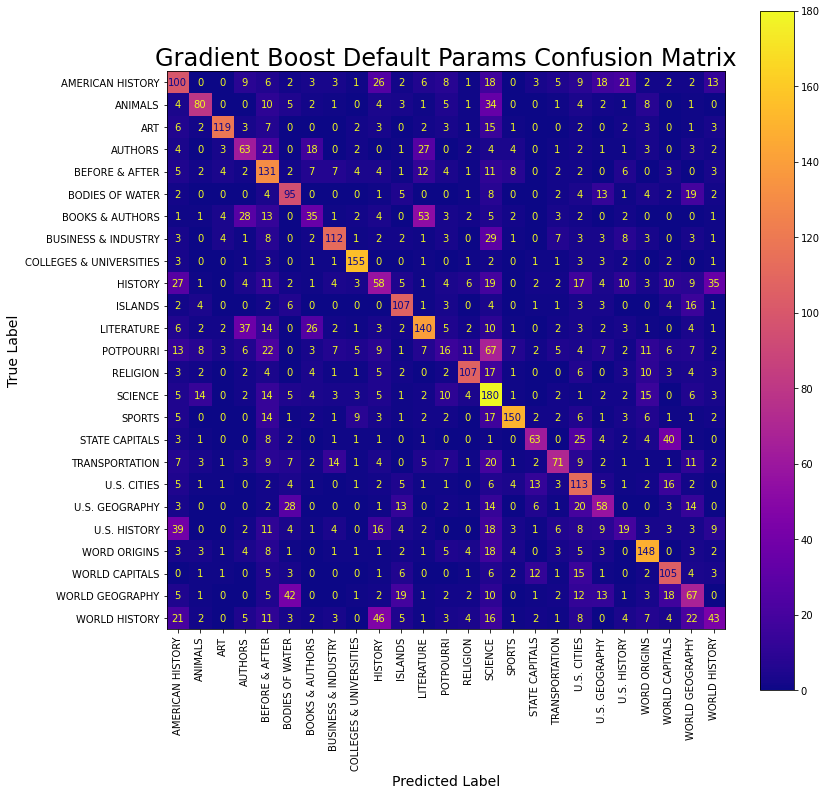

In [277]:
# Figure resizing guide: https://stackoverflow.com/a/62631438
# Label sizing guide: https://stackoverflow.com/questions/59839782/confusion-matrix-font-size 
fig, ax = plt.subplots(figsize=(12.5,12.5))
plot_confusion_matrix(gb, X_test_vec, y_test, 
                     ax=ax, 
                     xticks_rotation='vertical', 
                     cmap='plasma')
ax.set_xlabel('Predicted Label', size=14)
ax.set_ylabel('True Label', size=14)
ax.set_title('Gradient Boost Default Params Confusion Matrix', size=24);

**Interpretation:**  
The above confusion matrix shows how the default parameters performed. Several of the more unique categories performed very well which would be expected based on how different they are from other categories. The model ran into trouble with several of the history categories, and upon closer inspection, it does make sense. There are several overlaps. Most notable are American History and U.S. History, which might as well be the same category. In future iterations, we may try combining those categories into one master topic, but for the purposes of consistency, all similar categories from the board will remain as is for the duration of this project. 

In [288]:
# Evaluation library: 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
model_preds = [mnb_pred, rf_pred, ada_pred, gb_pred, knn_pred, dt_pred]
model_names = ['Multinomial Naive Bayes', 'Random Forest', 'AdaBoost', 'Gradient Boost',
              'K Nearest Neighbor', 'Decision Tree']
model_accuracy = [mnb_test, rf_test, ada_test, gb_test, knn_test, dt_test]

model_scores = []
for pred in model_preds:
    temp = pd.DataFrame(metrics.precision_recall_fscore_support(y_test, pred, 
                                                               average='macro',
                                                               zero_division=1), 
             index=['precision', 'recall', 'f1-score', 'support']).transpose()
    model_scores.append(temp)
    
scores = pd.concat(model_scores)
scores.index = model_names
scores = scores.drop(columns=['support'])
scores['accuracy'] = [score for score in model_accuracy]
scores.sort_values(by='accuracy', ascending=False)

,precision,recall,f1-score,accuracy
Random Forest,0.484327,0.475397,0.460811,0.479507
Gradient Boost,0.481235,0.471913,0.466710,0.471431
Multinomial Naive Bayes,0.559836,0.434444,0.428898,0.466990
K Nearest Neighbor,0.392436,0.392071,0.379892,0.392691
Decision Tree,0.335041,0.335127,0.333662,0.329497
AdaBoost,0.318356,0.228632,0.206368,0.231577


In [93]:
# https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1
print(metrics.classification_report(y_test, rf_pred, digits=3))

                         precision    recall  f1-score   support

       AMERICAN HISTORY      0.386     0.496     0.434       260
                ANIMALS      0.473     0.467     0.470       167
                    ART      0.802     0.600     0.686       175
                AUTHORS      0.326     0.346     0.335       162
         BEFORE & AFTER      0.540     0.706     0.612       221
        BODIES OF WATER      0.421     0.589     0.491       163
        BOOKS & AUTHORS      0.368     0.154     0.217       162
    BUSINESS & INDUSTRY      0.649     0.574     0.609       197
COLLEGES & UNIVERSITIES      0.782     0.851     0.815       181
                HISTORY      0.300     0.286     0.292       238
                ISLANDS      0.580     0.759     0.658       158
             LITERATURE      0.459     0.599     0.519       269
              POTPOURRI      0.205     0.069     0.104       231
               RELIGION      0.736     0.450     0.559       180
                SCIENCE 

In [ ]:
# TODO interpretation

### Gridsearching with Gradient Boost
Now that I've determined gradient boost may be the best model, I'll begin gridsearching some parameters to try to optimize the model for best performance. During this process, I don't fully expect the rate of false classifications to decrease too drastically because of the similarities between several of the categories, though I would expect correct classification rates to increase a bit as a result of tunung.  

The gridsearch parameters were set arbitrarily at the start then modified as a search finished to check for better or worse performance. The durations of the model fittings have been included for reference as well.

In [204]:
%%time
gboost = GradientBoostingClassifier()
gboost_params = {
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 125, 150, 200],
    'learning_rate': [0.08, 0.1, 0.12]
}

gb_gs = GridSearchCV(gboost, param_grid=gboost_params, cv=3, n_jobs=4)
gb_gs.fit(X_train_vec, y_train)

CPU times: user 2min 18s, sys: 2.49 s, total: 2min 21s
Wall time: 3h 36min 33s


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=4,
             param_grid={'learning_rate': [0.08, 0.1, 0.12],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 125, 150, 200]})

In [205]:
gb_gs.best_params_

{'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 200}

In [281]:
print(gb_gs.score(X_train_vec, y_train))
print(gb_gs.score(X_test_vec, y_test))

0.8428798727128083
0.48253583686654555


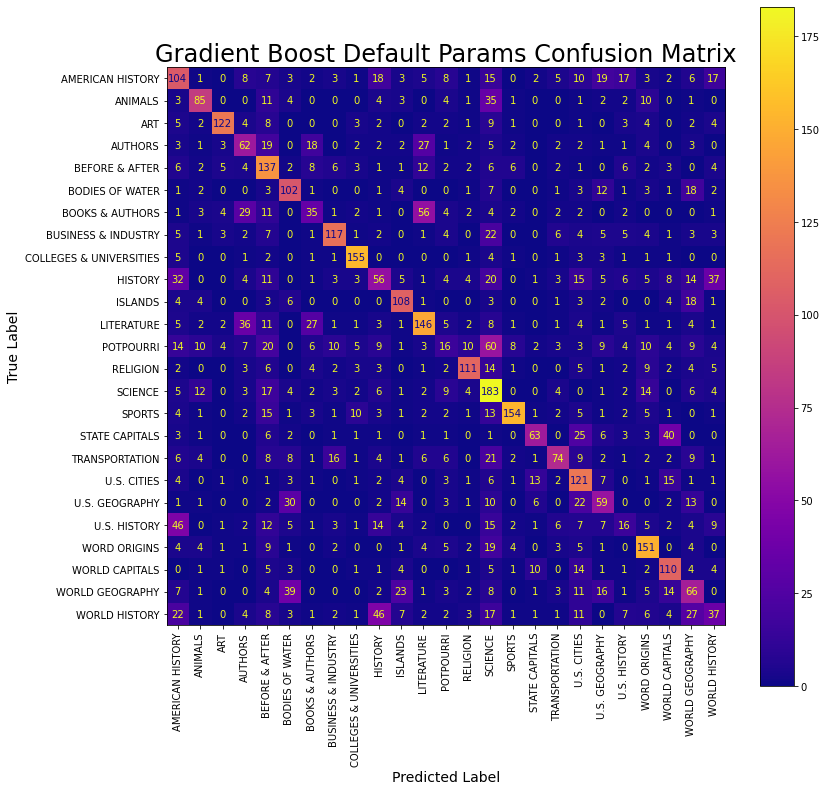

In [278]:
fig, ax = plt.subplots(figsize=(12.5,12.5))
plot_confusion_matrix(gb_gs, X_test_vec, y_test, 
                     ax=ax, 
                     xticks_rotation='vertical', 
                     cmap='plasma')
ax.set_xlabel('Predicted Label', size=14)
ax.set_ylabel('True Label', size=14)
ax.set_title('Gradient Boost Default Params Confusion Matrix', size=24);

**Interpretation:**  
This first gridsearch performed worse on average accuracy with the training data with the tradeoff being better performance on the testing data. One notable point is that the model performed better than the default model, incorrectly predicting 4 less U.S. History for American History. In the grand scheme, this misclassification isn't the end of the world, but I would like the model to perform as best it can. I'm fairly pleased with how the classifier is predicting those catgories without any obvious overlap, however.  

It seems the model's accuracy rate is trending in the right direction, so I will tune the parameters a bit more to see if I can squeeze out some more optimization.

In [207]:
%%time
new_params = {
    'max_depth': [2, 3, 4],
    'n_estimators': [200, 250, 300],
    'learning_rate': [0.08, 0.1, 0.12]
}

gb_gs2 = GridSearchCV(gboost, param_grid=new_params, cv=3, n_jobs=4)
gb_gs2.fit(X_train_vec, y_train)

CPU times: user 3min 52s, sys: 3.66 s, total: 3min 56s
Wall time: 15h 27min 41s


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=4,
             param_grid={'learning_rate': [0.08, 0.1, 0.12],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [200, 250, 300]})

In [285]:
gb_gs2.best_params_

{'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 250}

In [283]:
print(gb_gs2.score(X_train_vec, y_train))
print(gb_gs2.score(X_test_vec, y_test))

0.9623110580747812
0.48596810014132846


In [210]:
gb_gs_preds = gb_gs.predict(X_test_vec)
gb_gs2_preds = gb_gs2.predict(X_test_vec)

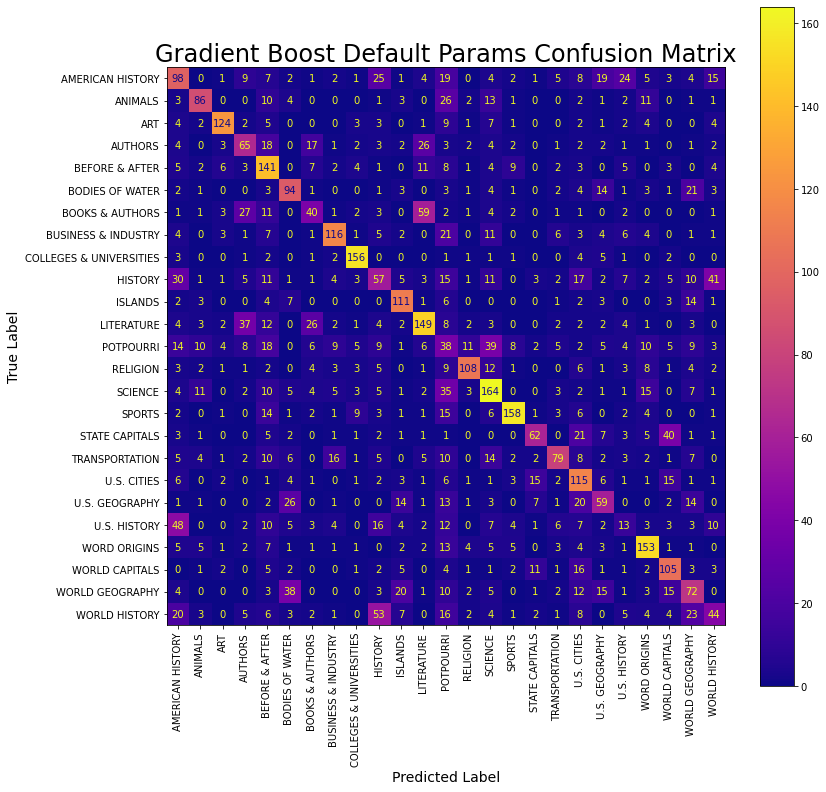

In [282]:
fig, ax = plt.subplots(figsize=(12.5,12.5))
plot_confusion_matrix(gb_gs2, X_test_vec, y_test, 
                     ax=ax, 
                     xticks_rotation='vertical', 
                     cmap='plasma')
ax.set_xlabel('Predicted Label', size=14)
ax.set_ylabel('True Label', size=14)
ax.set_title('Gradient Boost Default Params Confusion Matrix', size=24);

In the final iteration of gridsearching, I was able to increase the average accuracy by another small margin. Working from the original gridsearch parameters, I moved the n_estimators a bit higher while keeping the other search parameters constant. The newest gridsearch returned a max depth of the default: 3 and number of estimators to 250, which makes sense since gradient boosting often performs better with more estimators.  

In the essence of time, I had to stop gridsearching here, but with the small amount of improvement that this search returned, I don't anticipate much more improvement with how the target categories currently sit. Some further feature engineering or tuning may serve this model well, and I will be exploring that more moving forward. 

### Final Accuracy Score Comparison

In [295]:
print('Final Comparison of Testing Accuracy Scores:')
print('---------------------------------------------')
print(f"Default parameters: {gb.score(X_test_vec, y_test)}")
print(f"Initial parameter tuning: {gb_gs.score(X_test_vec, y_test)}")
print(f"Extra parameter tuning: {gb_gs2.score(X_test_vec, y_test)}")

Final Comparison of Testing Accuracy Scores:
---------------------------------------------
Default parameters: 0.4714314556834242
Initial parameter tuning: 0.48253583686654555
Extra parameter tuning: 0.48596810014132846


## Conclusions
Although I didn't get the accuracy I desired through the classification, I now have a clear direction to proceed in order to progress toward a better model. The strong similarities between several of the top categories used throughout the years by Jeopardy writers, mostly served to confuse the classifiers, with only the clearly defined, more unique categories performing well.  
<br/>

Future iterations of this model should exclude or combine those categories that are more like duplicates to others and be classified into broader category names such as History or Literature instead of smaller subsets of those. Additionally, some more work with clustering should be attempted to try to maximize its performance also. Perhaps then, the models can get more meaningful data to work with to optimize performance.  
<br/>

Given more time and computational resources, this model likely could perform much better than it has in this iteration, and I look forward to continued work to achieve more success. Unfortunately, only a limited number of attempts at optimization were available due to looming deadlines.